In [1]:
# 导入最基本的数据处理工具
# import numpy as np # 导入NumPy数学计算工具包
import pandas as pd # 导入Pandas数据处理工具包

In [2]:
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
# df_ads.astype(int)
df_ads.head(10) # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [3]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [4]:
# df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值

In [5]:
df_ads = df_ads.dropna() # 删除NaN值

In [6]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库

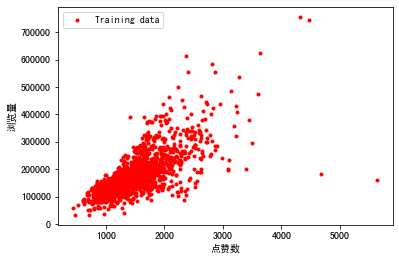

In [7]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

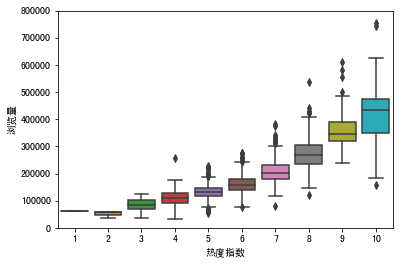

In [8]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [9]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉便签相关字段
y = df_ads.浏览量 # 标签集

In [10]:
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [11]:
y.head() # 显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [12]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression() # 使用线性回归算法创建模型

In [14]:
model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

In [15]:
y_pred = model.predict(X_test) #预测测试集的Y值

In [16]:
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['浏览量真值'] = y_test #测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred #测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


In [17]:
print("线性回归预测集评分：", model.score(X_test, y_test)) #评估模型
print("线性回归训练集评分：", model.score(X_train, y_train)) #训练集评分

线性回归预测集评分： 0.740552064611524
线性回归训练集评分： 0.7422107889561247
